# MQTT in a Nutshell

A self-containing notebook - no other notebook needs to be started

Illustrates the basic concepts of MQTT


**Discussion**: What is the difference between a database and a message broker?


Install paho

In [92]:
!pip install paho-mqtt==1.6.1

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifactory.tttech.com/api/pypi/infrastructure.pypi/simple
^C


In [ ]:
import paho.mqtt.client as mqtt #basic mqtt utilities

import time #for sleep

import random # random

import json #for json

from random import randint 

The library is not perfect: look at https://pypi.org/project/paho-mqtt/ - Known Issues

In [ ]:
#contains all messages that are received for debugging purposes
all_messages=[]

IP of the broker

In [ ]:
mqtt_broker_ip="127.0.0.1"

In [ ]:
mqtt_broker_port=1883 #default mqtt broker port

**Publish and Subscribe**

Create some clients (need not to run on the same machine!). Each client can publish and subscribe.

In [ ]:
client_ids=random.sample(range(1, 300), 3)
client_ids

[257, 224, 265]

In [ ]:
mqtt_client_1=mqtt.Client(client_id="myClient-"+ str(client_ids[0]), clean_session=True, userdata="Client 1", protocol=mqtt.MQTTv311, transport="tcp")
#transport: alternative websockets, userdata: user defined data of any type that is passed as the userdata parameter to callbacks

In [ ]:
mqtt_client_2=mqtt.Client(client_id="myClient2-"+ str(client_ids[1]), clean_session=True, userdata="Client 2", protocol=mqtt.MQTTv311, transport="tcp") 

In [ ]:
mqtt_client_3=mqtt.Client(client_id="myClient3-"+ str(client_ids[2]), clean_session=True, userdata="Client 3", protocol=mqtt.MQTTv311, transport="tcp") 

In [ ]:
mqtt_client_1.connect(mqtt_broker_ip, port=mqtt_broker_port, keepalive=60*4) 
#keepalive indicates when the broker is disconnected from the broker- PINGREQ/PINGRES are used to check connectivity
mqtt_client_2.connect(mqtt_broker_ip, port=mqtt_broker_port, keepalive=60*4)
mqtt_client_3.connect(mqtt_broker_ip, port=mqtt_broker_port, keepalive=60*4)

0

In [ ]:
# example: publish values in 1-second intervals
while(True):
    mqtt_client_1.publish("robotcell1/temperature", random.random()*100)  #publish random values
    time.sleep(2) #wait to seconds

Client client 6 robotcell1/temperature 0 b'75.27719645201488' retained: 0
Client client 6 robotcell1/temperature 0 b'61.376272205754155' retained: 0
Client client 6 robotcell1/temperature 0 b'40.38277245015711' retained: 0
Client client 6 robotcell1/temperature 0 b'44.659194479198305' retained: 0
Client client 6 robotcell1/temperature 0 b'24.954777279646166' retained: 0
Client client 6 robotcell1/temperature 0 b'54.514800248304205' retained: 0
Client client 6 robotcell1/temperature 0 b'66.68670280880461' retained: 0
Client client 6 robotcell1/temperature 0 b'79.27128578296505' retained: 0
Client client 6 robotcell1/temperature 0 b'71.17088957751109' retained: 0
Client client 6 robotcell1/temperature 0 b'24.82921960013321' retained: 0
Client client 6 robotcell1/temperature 0 b'62.74133749971574' retained: 0
Client client 6 robotcell1/temperature 0 b'17.527496871933245' retained: 0
Client client 6 robotcell1/temperature 0 b'40.304581767598826' retained: 0
Client client 6 robotcell1/tempe

KeyboardInterrupt: 

In [ ]:
mqtt_client_1.publish("robotcell1/temperature", payload=3, qos=0)

**Back to Slides: to discuss QoS**

In [ ]:
mqtt_client_1.publish("robotcell1/temperature", payload=4, qos=1)

In [ ]:
#will not work
msg=mqtt_client_1.publish("robotcell1/temperature", payload=19, qos=2)

In [ ]:
mqtt_client_1.loop_start()  #starts a loop in a thread
msg=mqtt_client_1.publish("robotcell1/temperature", payload=19, qos=2)

In [ ]:
msg.is_published()

True

In [ ]:
#mqtt_client_1.loop_stop()

Why is loop requiered here?

-> To handle the extra packets needed for high QoS

## Payload

MQTT makes no constraints regarding the payload - so JSON, XML as well as raw values are allowed!

In [ ]:
mqtt_client_1.publish("robotcell1/temperature", payload=3, qos=0)

In [ ]:
#create dict
payload ={ 
  "temperatur":3,
  "type":"robot front"
} 
      
# Serializing json  
json_object = json.dumps(payload, indent = 4) 

mqtt_client_1.publish("robotcell1/temperature", payload=json_object, qos=0)

## Subscribe

In [ ]:
def on_message(client, userdata, msg):
    print("Client " + str(userdata) + " " + msg.topic + " " + str(msg.qos) + " " + str(msg.payload) + " retained: " + str(msg.retain))
    
    #append to list of all messages
    all_messages.append(msg)

In [ ]:
mqtt_client_2.connect(mqtt_broker_ip, port=mqtt_broker_port, keepalive=60*4)
mqtt_client_2.loop_start()

### alternative to loop_start()
#import threading

#subscribe_thread=threading.Thread(target=mqtt_client_2.loop_forever)  # loop_forever is blocking!
#subscribe_thread.start()
mqtt_client_2.on_message=on_message #register callback

In [ ]:
mqtt_client_2.subscribe("robotcell1/temperature", qos=0) #subscribe to topic

(0, 1)

In [ ]:
#mqtt_client_2.loop_stop()

In [ ]:
mqtt_client_3.connect(mqtt_broker_ip, port=mqtt_broker_port, keepalive=60*4)
mqtt_client_3.loop_start()
mqtt_client_3.on_message=on_message 
mqtt_client_3.subscribe("robotcell1/temperature", qos=0) #subscribe to topic


(0, 1)

In [ ]:
#mqtt_client_3.publish("robotcell1/temperature",payload=5,qos=0)

In [ ]:
#mqtt_client_3.loop_stop()

Now, parse the content as JSON

In [ ]:
#def on_message_json(client, obj, msg):
#    print(msg.topic + " " + str(msg.qos) + " " + str(json.loads(msg.payload)))

In [ ]:
#mqtt_client_2.on_message=on_message_json #register callback

In [ ]:
# mqtt_client_2.loop_forever()

# In-Class Exercise

Assume the following structure in MQTT:


`robotcell1/temperature1=21`

`robotcell1/temperature2=26`


Simply create it in the broker by publishing to those topics.


Create a client, that subscribes to them and publishes the average to `robotcell1/avgtemperature`


# Wildcards (already discussed)

In [ ]:
#mqtt_client_2.loop_stop()

mqtt_client_2.subscribe("robotcell1/#", qos=0) #subscribe to topic

#mqtt_client_2.loop_start()
#mqtt_client_2.loop_stop()

Client Client 2 robotcell1/temperature2 0 b'7' retained: 1
Client Client 2 robotcell1/temperature1 0 b'79' retained: 1
Client Client 2 robotcell1/temperature2 0 b'7' retained: 1


(0, 2)

In [ ]:
mqtt_client_2.unsubscribe("robotcell1/#")
mqtt_client_2.subscribe("robotcell1/+", qos=0) #subscribe to topic
mqtt_client_2.loop_start()

3

In [ ]:
mqtt_client_2.loop_stop()

In [ ]:
mqtt_client_2.subscribe("robotcell1/+/int/+", qos=0) #subscribe to topic

(0, 5)

In [ ]:
mqtt_client_2.loop_start()

Client Client 2 robotcell1/temperature1 0 b'79' retained: 1


# In-Class Exercise

Create three clients (for three system components) that represent system components pushing cylinders. Cylinder 2 gets active after Cylinder 1 is in position, Cylinder 3 gest active after Cylinder 2 is in position.

Each Cylinder is represented by a topic

**Start Topics**:
    
`systemcomponent1/cylinderOn=False`

`systemcomponent2/cylinderOn=False`

`systemcomponent3/cylinderOn=False`


* The second system components should subscribe to the `cylinderOn` topic of the first system component and set the value of topic `systemcomponent2/cylinderOn=True` if  `systemcomponent1/cylinderOn=True`
* The thrid system component should subscribe to the `cylinderOn` topic of the second system component and set the value of topic `systemcomponent3/cylinderOn=True` if  `systemcomponent2/cylinderOn=True`
* The first system component should subscribe to the `cylinderOn` topic of the third system component and set the value of topic `systemcomponent1/cylinderOn=False` if  `systemcomponent3/cylinderOn=True`.

In order to test the setup, simply publish `True` to `systemcomponent1/cylinderOn`: then the value of the first cylinder should become False, while the other values should become True.



### Back to the slides

# Retained vs Non-Retained

In [93]:
mqtt_client_1.publish("robotcell1/temperature",payload=2,qos=0,retain=True)  #retained is false in the usual message flow

In [ ]:
mqtt_client_1.publish("robotcell1/temperature",payload=75,qos=0,retain=False)

Client Client 2 robotcell1/temperature 0 b'2' retained: 0
Client Client 2 robotcell1/temperature 0 b'75' retained: 0
Client Client 2 robotcell1/joints 0 b'{"joint0": 10, "joint1": 42, "joint2": 53, "joint3": 64, "joint4": 8, "joint5": 22}' retained: 0
Client Client 2 robotcell1/temperature 0 b'76' retained: 0
Client Client 2 robotcell1/temperature 0 b'39' retained: 0
Client Client 2 robotcell1/temperature 0 b'77' retained: 0
Client Client 2 robotcell1/temperature 0 b'99' retained: 0
Client Client 2 robotcell1/temperature 0 b'39' retained: 0
Client Client 2 robotcell1/temperature 0 b'77' retained: 0
Client Client 2 robotcell1/temperature 0 b'99' retained: 0
Client Client 2 robotcell1/temperature 0 b'75.27719645201488' retained: 0
Client Client 2 robotcell1/temperature 0 b'61.376272205754155' retained: 0
Client Client 2 robotcell1/temperature 0 b'40.38277245015711' retained: 0
Client Client 2 robotcell1/temperature 0 b'44.659194479198305' retained: 0
Client Client 2 robotcell1/temperatur

In [ ]:
mqtt_client_4=mqtt.Client(client_id="myClient4", clean_session=True, userdata="Client 4", protocol=mqtt.MQTTv311, transport="tcp") 

In [ ]:
mqtt_client_4.on_message=on_message
mqtt_client_4.connect(mqtt_broker_ip, port=1883, keepalive=60*4) 
mqtt_client_4.loop_start()

What payload will a new subscriber get?

In [ ]:
mqtt_client_4.subscribe("robotcell1/temperature", qos=0) 

(0, 1)

In [ ]:
mqtt_client_4.loop_stop()

Client Client 4 robotcell1/temperature 0 b'2' retained: 1


In [ ]:
mqtt_client_4.disconnect()

0

# Design

We can use differnt payloads in MQTT messages: from raw data values to complete JSON documents

Assume we have a robot with six axis and we want to publish the data to MQTT

In [ ]:
robot_joints=[10,42,53,64,8,22]  #for each joint we have a value representing the current position (degree)

In [ ]:
#Flatten-out the data
for idx,joint in enumerate(robot_joints):
    topic="robotcell1/joints/{0}".format(idx)
    print("...publish to " + topic )
    mqtt_client_1.publish(topic,payload=joint,qos=0)

...publish to robotcell1/joints/0
...publish to robotcell1/joints/1
...publish to robotcell1/joints/2
...publish to robotcell1/joints/3
...publish to robotcell1/joints/4
...publish to robotcell1/joints/5


In [ ]:
#Compact format...

joints={}
for idx,joint in enumerate(robot_joints):
    joints["joint"+str(idx)]=joint

In [ ]:
mqtt_client_1.publish("robotcell1/joints",payload=json.dumps(joints),qos=0)

**Discussion** 

What are the drawbacks/benefits of the two approaches:

* Data-Traffic when a joint is updated
* Effort for publishing data
* Serializing data to that structure and the data back?

# Clean Session

Create a client as before - with `clean_session=True`

In [94]:
mqtt_client_5=mqtt.Client(client_id="myClient5", clean_session=True, userdata="client 5", protocol=mqtt.MQTTv311, transport="tcp")  # clean session=True - same as on the top
time.sleep(1)

In [95]:
mqtt_client_5.on_message=on_message 
mqtt_client_5.connect(mqtt_broker_ip, port=1883, keepalive=60*4)
mqtt_client_5.loop_start()
time.sleep(1)

Create another client - with `clean_session=False`

In [96]:
mqtt_client_6=mqtt.Client(client_id="myClient6", clean_session=False, userdata="client 6", protocol=mqtt.MQTTv311, transport="tcp")  # clean session=False

In [97]:
mqtt_client_6.on_message=on_message
mqtt_client_6.connect(mqtt_broker_ip, port=1883, keepalive=60*4) 
mqtt_client_6.loop_start()
time.sleep(1)

Subscribe to the temperature topic

In [98]:
mqtt_client_6.subscribe("robotcell1/temperature",qos=0)
time.sleep(2)

In [99]:
mqtt_client_5.subscribe(topic="robotcell1/temperature",qos=0)
time.sleep(1)

Client client 5 robotcell1/temperature 0 b'2' retained: 1


So far, both get the same values

**simulate a disconnection of the two clients (e.g. a connection drop down...)**

In [100]:
mqtt_client_6.disconnect()
mqtt_client_6.loop_stop()
time.sleep(1)

In [101]:
mqtt_client_5.disconnect()
mqtt_client_5.loop_stop()
time.sleep(1)

In [102]:
#now new data is published which was relevant for the clients....
mqtt_client_1.publish("robotcell1/temperature",payload=76)  # NON RETAINED!!! QoS is 0 by default!

**simulate reconnection of the clients**

In [103]:
mqtt_client_6.reconnect()  #subscription is remembered
mqtt_client_6.loop_start()
time.sleep(1)

In [104]:
mqtt_client_5.reconnect()   #subscription is NOT remembered 
mqtt_client_5.loop_start()
time.sleep(1)

In [105]:
#retained values is returned!
mqtt_client_5.subscribe(topic="robotcell1/temperature",qos=0)

Client client 5 robotcell1/temperature 0 b'2' retained: 1


(0, 2)

### RETAINED vs NON-RETAINED
- RETAINED: The broker stores the last message and sends it to new subscribers
- NON-RETAINED: The broker does not store the last message and sends it to new subscribers

- This means that a new subscriber will get the last message sent to the topic if it is retained
- If the message is not retained, the new subscriber will not get the last message sent to the topic

### CLEAN SESSION
- If clean_session=True, the broker will not store the last message sent to the topic
- If clean_session=False, the broker will store the last message sent to the topic

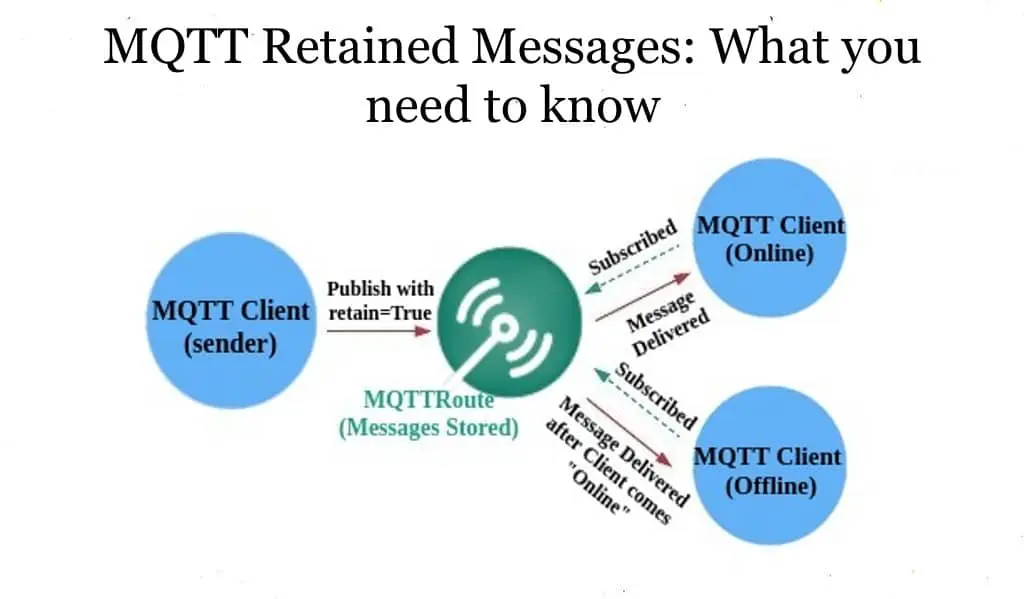

The message sent in the meantime is lost!

**Disconnect Again**

In [106]:
mqtt_client_6.disconnect()
mqtt_client_6.loop_stop()
time.sleep(1)

In [107]:
mqtt_client_5.disconnect()
mqtt_client_5.loop_stop()
time.sleep(1)

In [ ]:
#publish with QoS 1

In [ ]:
mqtt_client_1.publish("robotcell1/temperature",payload=39,qos=1)
mqtt_client_1.publish("robotcell1/temperature",payload=77,qos=1)
mqtt_client_1.publish("robotcell1/temperature",payload=99,qos=1)

In [ ]:
all_messages

**Re-Connect Again**

In [108]:
mqtt_client_6.connect(mqtt_broker_ip, port=1883, keepalive=60*4)   
mqtt_client_6.loop_start()

In [109]:
mqtt_client_5.connect(mqtt_broker_ip, port=1883, keepalive=60*4)   
mqtt_client_5.loop_start()

Also here the message sent in between is lost! So lets move up the QoS of the subscription to 1

In [ ]:
mqtt_client_6.subscribe("robotcell1/temperature",qos=1)

(0, 2)

In [ ]:
mqtt_client_5.subscribe("robotcell1/temperature",qos=1)

(0, 3)

**Disconnect**

In [ ]:
mqtt_client_6.disconnect()
mqtt_client_6.loop_stop()
time.sleep(1)

Client client 5 robotcell1/temperature 0 b'2' retained: 1


In [ ]:
mqtt_client_5.disconnect()
mqtt_client_5.loop_stop()
time.sleep(1)

**Sent QoS Messages in Between**

In [ ]:
mqtt_client_1.publish("robotcell1/temperature",payload=39,qos=1)
mqtt_client_1.publish("robotcell1/temperature",payload=77,qos=1)
mqtt_client_1.publish("robotcell1/temperature",payload=99,qos=1)

`Client 6` now receives all the **NON-RETAINED** values!

In [ ]:
mqtt_client_6.reconnect()
mqtt_client_6.loop_start()

Client client 6 robotcell1/temperature 1 b'39' retained: 0
Client client 6 robotcell1/temperature 1 b'77' retained: 0
Client client 6 robotcell1/temperature 1 b'99' retained: 0


In [ ]:
mqtt_client_5.reconnect()
mqtt_client_5.loop_start()
mqtt_client_5.subscribe("robotcell1/temperature",qos=1)

(0, 4)

Client client 5 robotcell1/temperature 0 b'2' retained: 1
Client client 5 robotcell1/temperature 0 b'75.27719645201488' retained: 0
Client client 5 robotcell1/temperature 0 b'61.376272205754155' retained: 0
Client client 5 robotcell1/temperature 0 b'40.38277245015711' retained: 0
Client client 5 robotcell1/temperature 0 b'44.659194479198305' retained: 0
Client client 5 robotcell1/temperature 0 b'24.954777279646166' retained: 0
Client client 5 robotcell1/temperature 0 b'54.514800248304205' retained: 0
Client client 5 robotcell1/temperature 0 b'66.68670280880461' retained: 0
Client client 5 robotcell1/temperature 0 b'79.27128578296505' retained: 0
Client client 5 robotcell1/temperature 0 b'71.17088957751109' retained: 0
Client client 5 robotcell1/temperature 0 b'24.82921960013321' retained: 0
Client client 5 robotcell1/temperature 0 b'62.74133749971574' retained: 0
Client client 5 robotcell1/temperature 0 b'17.527496871933245' retained: 0
Client client 5 robotcell1/temperature 0 b'40.304